<a href="https://colab.research.google.com/github/SohelRaja/Consensus-and-Ensemble-Model/blob/main/Imbalanced%20Data%20with%20Same%20Ratio/EnsembleClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [3]:
datasetUrl = 'https://raw.githubusercontent.com/SohelRaja/Consensus-and-Ensemble-Model/main/Datasets/colon.csv'

In [4]:
colon = pd.read_csv(datasetUrl)

In [5]:
colon.head(5)

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.0712,3166.5800,930.3038,2018.3550,2065.5945,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.23810,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.3625,2490.8738,3759.5850,4268.9185,4166.1914,4286.6900,2699.2844,2796.0833,1015.9143,1459.10250,2865.0388,1156.9563,1351.9650,3218.32130,3855.5337,3097.4539,1667.5425,2779.3037,1064.2675,2430.8790,2814.2800,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.53810,91.29500,86.03611,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.6200,1378.1200,797.1925,1880.1875,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.11190,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.6912,1139.6274,2662.0974,2636.1562,3134.7476,4244.0700,1186.8938,2342.3820,792.2143,1133.23750,969.8237,835.3862,1392.7162,3034.57130,4699.3950,3312.4812,854.4288,1880.5400,1329.3225,3124.2488,2456.0930,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.44524,90.45500,140.83057,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,5,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,2648.2676,1073.41000,1207.41

## Data Analysis

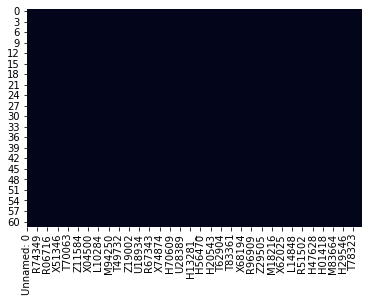

In [6]:
sns.heatmap(colon.isnull(),cbar=False)

In [7]:
df = colon.drop(columns=['Unnamed: 0'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2001 entries, H55933 to Class
dtypes: float64(2000), object(1)
memory usage: 969.4+ KB


## Creating Two Different Dataframes

In [9]:
df['Class'].value_counts()

Abnormal    40
Normal      22
Name: Class, dtype: int64

In [10]:
df_majority = pd.DataFrame(columns=df.columns)
df_minority = pd.DataFrame(columns=df.columns)
majority_index, minority_index = 0, 0
for i in range(len(df)):
  if df.iloc[i]['Class'] == 'Abnormal':
    df_majority.loc[majority_index] = df.iloc[i]
    majority_index += 1
  else:
    df_minority.loc[minority_index] = df.iloc[i]
    minority_index += 1
print(df_majority.shape, df_minority.shape)

(40, 2001) (22, 2001)


In [11]:
df_majority

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.59880,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.01430,1135.82390,2365.24240,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.07120,3166.58000,930.3038,2018.35500,2065.59450,2065.59450,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.238100,64.71125,88.444440,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.110720,67.56125,259.91250,138.89874,88.23250,39.667860,67.82875,75.67750,83.52250,28.70125,Abnormal
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.85380,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.44290,734.52875,763.30750,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.62000,1378.12000,797.1925,1880.18750,1389.63020,1389.63020,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.413890,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,Abnormal
2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.69630,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.98930,1903.58250,1568.11130,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.65000,1381.4825,719.45250,967.35760,967.35760,...,40.36000,22.07125,6.37000,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.741670,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.464290,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,Abnormal
3,7126.5986,3779.0680,3705.5537,6594.5140,2460.9048,3775.6821,2621.4187,2047.2812,6411.2676,3857.1190,1496.4062,1604.2615,1489.90500,1364.1700,2093.50120,3048.0790,1324.5413,1452.9150,2003.4838,2217.3400,3247.1390,3275.5664,3186.0576,1905.6438,1557.7375,3116.1953,925.72020,1644.27620,1902.57250,2218.7424,2194.0725,1298.09250,2604.6350,1743.8225,1068.41880,1901.38120,1749.7913,1746.84380,1033.70790,1033.70790,...,87.49750,277.92624,46.21875,73.46250,105.653570,11.93875,84.57125,37.15750,25.00500,141.43124,132.32375,27.303572,44.940475,73.33250,197.258330,48.70500,39.35375,36.76125,69.35250,36.950000,56.70625,77.884720,34.12250,24.34875,52.284210,36.623215,72.24625,53.30000,154.84125,147.804760,51.03250,80.19000,76.48500,98.53750,54.621430,30.54000,52.96125,37.23625,24.44500,Abnormal
4,9330.6790,7017.2295,4723.7827,9491.5340,5346.5415,1557.1430,1969.0800,2295.4026,6880.3460,6162.8930,7927.6523,2022.6731,1427.51250,3334.2850,5329.66400,1547.2167,4694.5800,2193.6938,1077.5350,1433.4100,4611.5550,9533.9350,4302.4536,10721.2980,2199.5405,6264.4927,1278.

In [12]:
df_minority

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.36250,2490.87380,3759.5850,4268.9185,4166.19140,4286.69000,2699.28440,2796.08330,1015.91430,1459.1025,2865.03880,1156.95630,1351.9650,3218.32130,3855.53370,3097.4539,1667.54250,2779.30370,1064.26750,2430.87900,2814.28000,2814.28000,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.538100,91.29500,86.036110,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.789290,92.23875,96.27625,150.59000,82.23750,85.033330,152.19500,186.56750,44.47250,16.77375,Normal
1,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.69120,1139.62740,2662.0974,2636.1562,3134.74760,4244.07000,1186.89380,2342.38200,792.21430,1133.2375,969.82370,835.38620,1392.7162,3034.57130,4699.39500,3312.4812,854.42880,1880.54000,1329.32250,3124.24880,2456.09300,2456.09300,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.445240,90.45500,140.830570,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.595250,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500,Normal
2,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,2289.0350,2162.2866,2070.0774,3466.7913,2137.41800,2716.3792,1497.1588,1586.2438,962.01000,1214.76750,904.7225,3970.4226,906.59625,1313.05880,1950.39060,1788.14640,1254.51550,1639.1475,819.18870,1454.76250,1227.4187,916.71250,576.78375,745.3400,994.61250,540.46875,1236.07620,422.65625,1374.15540,1374.15540,...,42.30250,26.41500,18.27000,16.17875,36.127380,213.55125,37.78250,29.52500,27.13875,74.56125,34.43875,16.604761,111.280950,61.57250,41.211110,39.77750,28.01250,23.72375,87.18000,6.088158,26.13000,18.765278,50.26000,24.35000,15.419737,13.553571,84.20625,47.47875,73.50500,122.533330,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375,Normal
3,4028.7100,3156.1592,2870.2550,4417.5913,1854.1060,2828.3037,1427.5262,3390.7063,4373.0440,3080.4512,5784.1210,2222.2078,2502.8100,3616.2460,1673.22620,4623.0790,1871.7600,3154.8286,1624.41130,1150.88500,1309.1838,3015.6390,1206.18750,1640.31500,2641.15000,1752.55360,1531.52860,2560.4424,1293.77620,3926.41750,1013.6188,786.10126,1077.68750,1956.6438,987.24380,749.75000,1259.82390,1215.65250,2276.83420,2276.83420,...,67.69750,63.61125,68.41250,19.34500,62.545240,382.57126,70.14375,21.97125,38.42750,111.66125,33.32250,48.369050,190.659520,45.42625,73.486115,71.57875,56.23500,14.12000,135.63875,45.438156,60.20625,6.072222,46.43875,54.94750,12.184211,38.391070,60.52750,14.93000,96.66000,116.194050,46.67375,172.78876,51.82375,97.85500,98.982140,24.19625,29.76625,44.37625,52.29000,Normal
4,5271.5176,4740.7680,3318.5137,6792.3480,2632.8894,5449.2070,4623.2124,3277.4038,4488.0600,3343.8108,3830.4250,3046.9463,8878.3090,5729.3213,2763.32250,5865.6580,1828.0662,3078.7437,3741.37000,4443.52000,2707.7550,5904.6025,1806.13870,3337.09

In [13]:
df_majority_X = df_majority.drop(['Class'],axis=1)
df_majority_y = df_majority['Class']

df_minority_X = df_minority.drop(['Class'],axis=1)
df_minority_y = df_minority['Class']

## Taking Dummy Values

In [14]:
df_majority_Y = pd.get_dummies(df_majority_y)

df_minority_Y = pd.get_dummies(df_minority_y,columns=['Normal'])

In [15]:
df_majority_Y.head(), df_minority_Y.head()

(   Abnormal
 0         1
 1         1
 2         1
 3         1
 4         1,    Normal
 0       1
 1       1
 2       1
 3       1
 4       1)

## Spliting of Training and testing dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train_majority, X_test_majority, y_train_majority, y_test_majority = train_test_split(df_majority_X, df_majority_y, test_size=0.25, random_state=101)

In [18]:
X_train_minority, X_test_minority, y_train_minority, y_test_minority = train_test_split(df_minority_X, df_minority_y, test_size=0.25, random_state=101)

In [19]:
type(X_train_majority)

pandas.core.frame.DataFrame

In [20]:
X_train = pd.concat([X_train_majority, X_train_minority], axis=0)
X_test = pd.concat([X_test_majority, X_test_minority], axis=0)
y_train = pd.concat([y_train_majority, y_train_minority], axis=0)
y_test = pd.concat([y_test_majority, y_test_minority], axis=0)

In [21]:
X_train.columns

Index(['H55933', 'R39465', 'R39465_', 'R85482', 'U14973', 'R02593', 'T51496',
       'H80240', 'T65938', 'T55131',
       ...
       'X67699', 'R70790', 'L11706', 'T90549', 'D17390', 'M33210', 'H18490',
       'H40891', 'R77780', 'T49647'],
      dtype='object', length=2000)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46, 2000) (16, 2000) (46,) (16,)


In [23]:
type(y_train)

pandas.core.series.Series

In [24]:
y_train = pd.Series(y_train, name="Abnormal")
y_test = pd.Series(y_test, name="Abnormal")

# Converting pandas series into dataframe
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [25]:
y_train['Abnormal'].replace(to_replace=[['Abnormal'],['Normal']],value=[1,0],inplace=True)
y_test['Abnormal'].replace(to_replace=[['Abnormal'],['Normal']],value=[1,0],inplace=True)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46, 2000) (16, 2000) (46, 1) (16, 1)


## KNN Classification

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
clf_knn = KNeighborsClassifier()

hyperparameters_knn = {
    'leaf_size': list(range(1,25)),
    'n_neighbors': list(range(1,16))
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gs_knn = GridSearchCV(clf_knn, param_grid=hyperparameters_knn, cv=cv,n_jobs=-1,verbose=2)
gs_knn_result = gs_knn.fit(X_train, y_train)

print("Best: %f using %s" % (gs_knn_result.best_score_, gs_knn_result.best_params_))

Fitting 30 folds for each of 360 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 5644 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9204 tasks      | elapsed:  1.8min


Best: 0.855000 using {'leaf_size': 1, 'n_neighbors': 4}


[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:  2.1min finished


In [30]:
df_knn_result = pd.DataFrame(gs_knn.cv_results_)
df_knn_result[['param_leaf_size','param_n_neighbors','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score').head(15)

,param_leaf_size,param_n_neighbors,params,mean_test_score,std_test_score,rank_test_score
168,12,4,"{'leaf_size': 12, 'n_neighbors': 4}",0.855,0.172892,1
288,20,4,"{'leaf_size': 20, 'n_neighbors': 4}",0.855,0.172892,1
48,4,4,"{'leaf_size': 4, 'n_neighbors': 4}",0.855,0.172892,1
273,19,4,"{'leaf_size': 19, 'n_neighbors': 4}",0.855,0.172892,1
63,5,4,"{'leaf_size': 5, 'n_neighbors': 4}",0.855,0.172892,1
258,18,4,"{'leaf_size': 18, 'n_neighbors': 4}",0.855,0.172892,1
243,17,4,"{'leaf_size': 17, 'n_neighbors': 4}",0.855,0.172892,1
93,7,4,"{'leaf_size': 7, 'n_neighbors': 4}",0.855,0.172892,1
33,3,4,"{'leaf_size': 3, 'n_neighbors': 4}",0.855,0.172892,1
228,16,4,"{'leaf_size': 16, 'n_neighbors': 4}",0.855,0.172892,1


In [31]:
best_gs_knn = gs_knn.best_estimator_
best_gs_knn

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [32]:
best_gs_knn.fit(X_train, y_train)
best_gs_knn_y_pred = best_gs_knn.predict(X_test)
best_gs_knn_y_pred_train = best_gs_knn.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_knn_y_pred_train), accuracy_score(y_test, best_gs_knn_y_pred)))

Training accuracy: 0.891304 and Testing accuracy: 0.875000


In [33]:
knn_cross_scores = cross_val_score(best_gs_knn, X_train, y_train, cv=cv, scoring="accuracy")
knn_cross_scores.mean()

0.855

#### Bagging For KNN

In [34]:
n = 30
l_knn = []
clf_base = best_gs_knn
for i in range(1,n):
  bg = BaggingClassifier(base_estimator=clf_base,max_samples=0.7,max_features=0.7,n_estimators=i)
  bg.fit(X_train,y_train)
  l_knn.append(bg.score(X_test,y_test))

In [35]:
print("accuracy = " + str(max(l_knn))+ " with estimator "+ str(1+l_knn.index(max(l_knn))))

accuracy = 0.875 with estimator 3


## Logistic Regression

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()

hyperparameters_logreg = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet']
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gs_logreg = GridSearchCV(estimator=clf_logreg, param_grid=hyperparameters_logreg, n_jobs=-1, cv=cv, scoring='accuracy',verbose=2)
gs_logreg_result = gs_logreg.fit(X_train, y_train)

print("Best: %f using %s" % (gs_logreg_result.best_score_, gs_logreg_result.best_params_))

Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:    4.5s


Best: 0.871667 using {'C': 10, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    6.0s finished


In [37]:
df_logreg_result = pd.DataFrame(gs_logreg.cv_results_)
df_logreg_result[['param_C','param_penalty','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_C,param_penalty,params,mean_test_score,std_test_score,rank_test_score
4,10,l2,"{'C': 10, 'penalty': 'l2'}",0.871667,0.161598,1
7,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.871667,0.161598,1
1,100,l2,"{'C': 100, 'penalty': 'l2'}",0.870000,0.145258,3
10,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.865000,0.160286,4
13,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.865000,0.160286,4
0,100,l1,"{'C': 100, 'penalty': 'l1'}",NaN,NaN,6
2,100,elasticnet,"{'C': 100, 'penalty': 'elasticnet'}",NaN,NaN,7
3,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,8
5,10,elasticnet,"{'C': 10, 'penalty': 'elasticnet'}",NaN,NaN,9
6,1,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,10


In [38]:
best_gs_logreg = gs_logreg.best_estimator_
best_gs_logreg

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
best_gs_logreg.fit(X_train, y_train)
best_gs_logreg_y_pred = best_gs_logreg.predict(X_test)
best_gs_logreg_y_pred_train = best_gs_logreg.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_logreg_y_pred_train), accuracy_score(y_test, best_gs_logreg_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.812500


In [40]:
# Cross Validation
logreg_cross_scores = cross_val_score(best_gs_logreg, X_train, y_train, cv=cv, scoring="accuracy")
logreg_cross_scores.mean()

0.8716666666666667

#### Adaboost for Logistic Regression

In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc_logreg = AdaBoostClassifier(base_estimator=best_gs_logreg)
abc_logreg.fit(X_train,y_train)
abc_logreg_y_pred = abc_logreg.predict(X_test)
abc_logreg_y_pred_train = abc_logreg.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, abc_logreg_y_pred_train), accuracy_score(y_test, abc_logreg_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.812500


In [42]:
# Cross Validation
logreg_cross_scores_abc = cross_val_score(abc_logreg, X_train, y_train, cv=cv, scoring="accuracy")
logreg_cross_scores_abc.mean()

0.8716666666666667

#### Bagging For Logistic Regression

In [43]:
n = 30
l_lr = []

clf_base = best_gs_logreg

for i in range(1,n):
  bg_lr = BaggingClassifier(base_estimator=clf_base,max_samples=0.5,max_features=1.0,n_estimators=i)
  bg_lr.fit(X_train,y_train)
  l_lr.append(bg_lr.score(X_test,y_test))

In [44]:
print("accuracy = " + str(max(l_lr))+ " with estimator "+ str(1+l_lr.index(max(l_lr))))

accuracy = 0.8125 with estimator 2


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

hyper_parameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,10)),
    'min_samples_split': list(range(2,10)),
    'min_samples_leaf': list(range(1,10,2))
}

clf_dt = DecisionTreeClassifier()

gs_dt = GridSearchCV(clf_dt, param_grid=hyper_parameters_dt, verbose=2)
gs_dt.fit(X_train,y_train)
print("Best: %f using %s" % (gs_dt.best_score_, gs_dt.best_params_))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, 

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  1.4min finished


In [46]:
df_dt_result = pd.DataFrame(gs_dt.cv_results_)
df_dt_result[['param_criterion','param_max_depth','param_min_samples_leaf','param_min_samples_split','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score').head(15)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,mean_test_score,std_test_score,rank_test_score
90,gini,3,3,4,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.802222,0.085606,1
294,gini,8,3,8,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.802222,0.085606,1
288,gini,8,3,2,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.802222,0.085606,1
333,gini,9,3,7,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.802222,0.085606,1
251,gini,7,3,5,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.802222,0.085606,1
49,gini,2,3,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.802222,0.085606,1
210,gini,6,3,4,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.802222,0.085606,1
215,gini,6,3,9,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.802222,0.085606,1
53,gini,2,3,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.802222,0.085606,1
55,gini,2,3,9,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.802222,0.085606,1


In [47]:
best_gs_dt = gs_dt.best_estimator_
best_gs_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
best_gs_dt.fit(X_train, y_train)
best_gs_dt_y_pred = best_gs_dt.predict(X_test)
best_gs_dt_y_pred_train = best_gs_dt.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_dt_y_pred_train), accuracy_score(y_test, best_gs_dt_y_pred)))

Training accuracy: 0.956522 and Testing accuracy: 0.625000


In [49]:
# Cross Validation
dt_cross_scores = cross_val_score(best_gs_dt, X_train, y_train, cv=cv, scoring="accuracy")
dt_cross_scores.mean()

0.6883333333333334

#### Adaboost for Decision Tree

In [50]:
from sklearn.ensemble import AdaBoostClassifier
abc_dt = AdaBoostClassifier(base_estimator=best_gs_dt)
abc_dt.fit(X_train,y_train)
abc_dt_y_pred = abc_dt.predict(X_test)
abc_dt_y_pred_train = abc_dt.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, abc_dt_y_pred_train), accuracy_score(y_test, abc_dt_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.750000


In [51]:
# Cross Validation
dt_cross_scores_abc = cross_val_score(abc_dt, X_train, y_train, cv=cv, scoring="accuracy")
dt_cross_scores_abc.mean()

0.7333333333333335

## SVM

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

hyper_parameters = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['linear', 'rbf']
        }

gs_svm = GridSearchCV(estimator=SVC(), param_grid=hyper_parameters, verbose=True)

gs_svm.fit(X_train,y_train)
print("Best: %f using %s" % (gs_svm.best_score_, gs_svm.best_params_))
print(gs_svm.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.866667 using {'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   14.2s finished


In [53]:
df_svm_result = pd.DataFrame(gs_svm.cv_results_)
df_svm_result[['param_C','param_gamma','param_kernel','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_C,param_gamma,param_kernel,params,mean_test_score,std_test_score,rank_test_score
0,0.05,0.1,linear,"{'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}",0.866667,0.083148,1
110,0.4,0.6,linear,"{'C': 0.4, 'gamma': 0.6, 'kernel': 'linear'}",0.866667,0.083148,1
108,0.4,0.5,linear,"{'C': 0.4, 'gamma': 0.5, 'kernel': 'linear'}",0.866667,0.083148,1
184,0.8,0.3,linear,"{'C': 0.8, 'gamma': 0.3, 'kernel': 'linear'}",0.866667,0.083148,1
106,0.4,0.4,linear,"{'C': 0.4, 'gamma': 0.4, 'kernel': 'linear'}",0.866667,0.083148,1
...,...,...,...,...,...,...,...
109,0.4,0.5,rbf,"{'C': 0.4, 'gamma': 0.5, 'kernel': 'rbf'}",0.653333,0.026667,121
111,0.4,0.6,rbf,"{'C': 0.4, 'gamma': 0.6, 'kernel': 'rbf'}",0.653333,0.026667,121
113,0.4,0.7,rbf,"{'C': 0.4, 'gamma': 0.7, 'kernel': 'rbf'}",0.653333,0.026667,121
159,0.6,1,rbf,"{'C': 0.6, 'gamma': 1.0, 'kernel': 'rbf'}",0.653333,0.026667,121


In [54]:
best_gs_svm = gs_svm.best_estimator_
best_gs_svm

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
best_gs_svm.fit(X_train, y_train)
best_gs_svm_y_pred = best_gs_svm.predict(X_test)
best_gs_svm_y_pred_train = best_gs_svm.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_svm_y_pred_train), accuracy_score(y_test, best_gs_svm_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.812500


In [56]:
# Cross Validation
svm_cross_scores = cross_val_score(best_gs_svm, X_train, y_train, cv=cv, scoring="accuracy")
svm_cross_scores.mean()

0.8733333333333334

#### Bagging For SVM

In [57]:
n = 30
l_svm = []

for i in range(1,n):
  bg_svm= BaggingClassifier(base_estimator=best_gs_svm,max_samples=0.5,max_features=1.0,n_estimators=i)
  bg_svm.fit(X_train,y_train)
  l_svm.append(bg_svm.score(X_test,y_test))

In [58]:
print("accuracy = " + str(max(l_svm))+ " with estimator "+ str(1+l_svm.index(max(l_svm))))

accuracy = 0.875 with estimator 1


### Adaboosting For SVM

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc_svm = AdaBoostClassifier(base_estimator=best_gs_svm, algorithm='SAMME')
abc_svm.fit(X_train,y_train)
abc_svm_y_pred = abc_svm.predict(X_test)
abc_svm_y_pred_train = abc_svm.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, abc_svm_y_pred_train), accuracy_score(y_test, abc_svm_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.812500


In [60]:
# Cross Validation
svm_cross_scores_abc = cross_val_score(abc_svm, X_train, y_train, cv=cv, scoring="accuracy")
print(svm_cross_scores_abc)
svm_cross_scores_abc.mean()

[0.6  1.   1.   0.8  0.6  1.   1.   0.5  0.75 1.   0.8  0.8  1.   0.6
 0.8  0.8  1.   1.   1.   1.   1.   0.6  0.8  1.   1.   1.   0.75 1.
 1.   1.  ]


0.8733333333333334

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

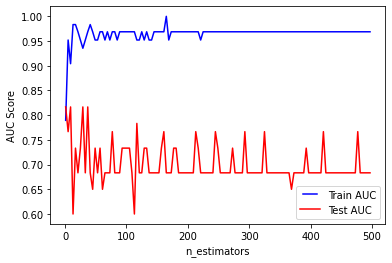

In [62]:
n_estimators = range(1,500,4)
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini', min_samples_leaf=4, min_samples_split=8, max_depth=2)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

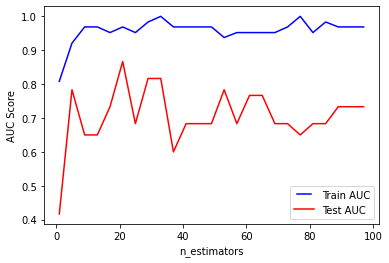

In [63]:
n_estimators = range(1,100,4)
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini', min_samples_leaf=4, min_samples_split=8, max_depth=2)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [64]:
for i in range(1,41):
  rf = RandomForestClassifier(n_estimators = i, criterion='gini', min_samples_leaf=4, min_samples_split=8, max_depth=2)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  rf_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
  print('Accuracy(Random Forest): ',rf_accuracy,'%', ' for n_estimators: ',i)

Accuracy(Random Forest):  56.25 %  for n_estimators:  1
Accuracy(Random Forest):  68.75 %  for n_estimators:  2
Accuracy(Random Forest):  68.75 %  for n_estimators:  3
Accuracy(Random Forest):  62.5 %  for n_estimators:  4
Accuracy(Random Forest):  62.5 %  for n_estimators:  5
Accuracy(Random Forest):  62.5 %  for n_estimators:  6
Accuracy(Random Forest):  56.25 %  for n_estimators:  7
Accuracy(Random Forest):  81.25 %  for n_estimators:  8
Accuracy(Random Forest):  68.75 %  for n_estimators:  9
Accuracy(Random Forest):  62.5 %  for n_estimators:  10
Accuracy(Random Forest):  68.75 %  for n_estimators:  11
Accuracy(Random Forest):  56.25 %  for n_estimators:  12
Accuracy(Random Forest):  62.5 %  for n_estimators:  13
Accuracy(Random Forest):  75.0 %  for n_estimators:  14
Accuracy(Random Forest):  68.75 %  for n_estimators:  15
Accuracy(Random Forest):  75.0 %  for n_estimators:  16
Accuracy(Random Forest):  75.0 %  for n_estimators:  17
Accuracy(Random Forest):  81.25 %  for n_estimat

## GradientBoosing

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [68]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.750
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.88      0.70      0.78        10

    accuracy                           0.75        16
   macro avg       0.75      0.77      0.75        16
weighted avg       0.78      0.75      0.75        16



#### Tune Learning rate and n_estimator

In [70]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.10007596, 0.1557601 , 0.26892371, 0.37978158, 0.4869113 ,
         0.59976835, 0.70414724, 0.83165135, 0.10788784, 0.17010217,
         0.28829155, 0.39607439, 0.49918909, 0.61779094, 0.7237803 ,
         0.83227901, 0.13134542, 0.23043213, 0.34170508, 0.46107869,
         0.5525548 , 0.66549921, 0.77317781, 0.88574157, 0.14127407,
         0.33436584, 0.64234228, 0.88842163, 0.99450264, 1.11170411,
         1.21818857, 1.33486118, 0.14148169, 0.341292  , 0.64674921,
         0.93664985, 1.22676721, 1.47911577, 1.73534923, 1.87149849,
         0.1256556 , 0.29591064, 0.60132546, 0.90755305, 1.24042625,
         1.545544  , 1.84329152, 2.09366431]),
  'mean_score_time': array([0.00525117, 0.0050561 , 0.00523238, 0.0054049 , 0.00542693,
         0.00559955, 0.00559983, 0.00568581, 0.00493178, 0.00497317,
         0.00520296, 0.00543337, 0.0054534 , 0.00556002, 0.00565   ,
         0.00583773, 0.00513639, 0.00490475, 0.00501103, 0.0054481 ,
         0.00549083,

#### Tune max_depth

In [71]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.21685896, 1.26878715, 1.22858167, 1.17441821, 1.2023201 ,
         1.20518756]),
  'mean_score_time': array([0.00596557, 0.00607634, 0.00605578, 0.00618224, 0.006147  ,
         0.00565581]),
  'mean_test_score': array([0.84444444, 0.86666667, 0.86666667, 0.86666667, 0.86666667,
         0.86666667]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'rank_test_score': array([6, 1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([1., 1., 1., 1., 1., 1.]),
  'split1_test_score': array([0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556,
         0.55555556]),
  'split2_test_score': array([0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
         0.88888889]),
  'split3_te

#### Tune Subsample

In [72]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.9167161 , 0.90173755, 0.90080724, 0.88052564, 0.8941937 ,
         0.8951797 , 0.61893439]),
  'mean_score_time': array([0.00572457, 0.00714564, 0.00590324, 0.00560985, 0.00573611,
         0.00559855, 0.00522027]),
  'mean_test_score': array([0.65333333, 0.65333333, 0.65333333, 0.65333333, 0.65333333,
         0.65333333, 0.65333333]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 0.95},
   {'subsample': 1}],
  'rank_test_score': array([1, 1, 1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]),
  'split1_test_score': array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
         0.66666667, 0.66666667]),
  

#### After Tuning(GradientBoost)

In [73]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=750,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=0.7,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.2f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.75
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.88      0.70      0.78        10

    accuracy                           0.75        16
   macro avg       0.75      0.77      0.75        16
weighted avg       0.78      0.75      0.75        16



## XGBoosting

In [74]:
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


#### Tune max_depth and min_child_weight

In [75]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.05863252, 0.80265517, 0.76311131, 1.38280563, 0.87633138,
         0.82942948, 1.27802701, 0.95321908, 0.85107055, 1.32643847,
         0.90593996, 0.75211153]),
  'mean_score_time': array([0.09940867, 0.11405911, 0.15017638, 0.15193677, 0.20503778,
         0.20262346, 0.16900477, 0.1744494 , 0.13338513, 0.17723193,
         0.12045999, 0.10046496]),
  'mean_test_score': array([0.83333333, 0.85      , 0.5       , 0.83333333, 0.85      ,
         0.5       , 0.83333333, 0.85      , 0.5       , 0.83333333,
         0.85      , 0.5       ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
       

#### Tune gamma

In [76]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.84115305, 0.88878307, 0.85827236, 0.85237374, 0.81057358]),
  'mean_score_time': array([0.14173093, 0.19008303, 0.18056812, 0.09293628, 0.06161203]),
  'mean_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split3_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split4_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'std_fit_time': array([0.14212461, 0.09567371, 0.13523353, 0.15423751, 0.11759965]),
  'std_score_time': array([0.03011176, 0.06516503, 0.03583

#### After Tune - XGBoosting

In [77]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


## Stacking

In [65]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [85]:
def stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [82]:
def getmodels():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['stacking'] = stacking()
	return models

In [87]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
	return scores

>lr 0.872 (0.162)
>knn 0.762 (0.167)
>cart 0.660 (0.211)
>svm 0.802 (0.170)
>stacking 0.872 (0.162)


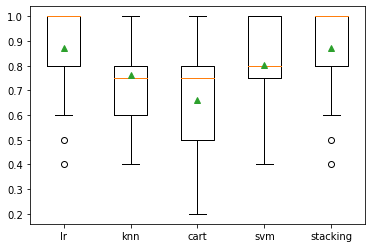

In [88]:
models = getmodels()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()